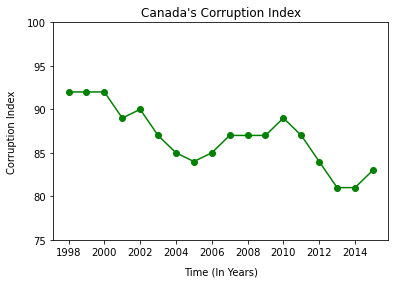

In [359]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Imports the file into our variable 'data'
csv_path = "/Users/base/Desktop/corruption index.csv"
data = pd.read_csv(csv_path)

# Replaces the str '-', with a nan values, then removes it
data = data.replace(to_replace='-',value=np.nan)
data = data.dropna()

# Resets our index, and deletes the old one
data.reset_index(inplace=True)
del data['index']

# Adjusts data by multiplying values usings the old formula by 10
adjusted_values = data.loc[:, '1998':'2011'].astype(float)
adjusted_values = adjusted_values.apply(lambda x: round(x*10)).astype(int).astype(str)
data.loc[:, '1998':'2011'] = adjusted_values

# Takes Canada's Corruption Index data over time and plots it
canada = data.iloc[9][1:].astype(int)
corruption = plt.plot(canada,'go-')
plt.xlabel('Time (In Years)', labelpad=10)
plt.ylabel('Corruption Index', labelpad=10)
plt.title("Canada's Corruption Index")
plt.xticks(ticks=['1998','2000','2002','2004','2006','2008','2010','2012','2014'])
plt.ylim(75, 100)
plt.show()


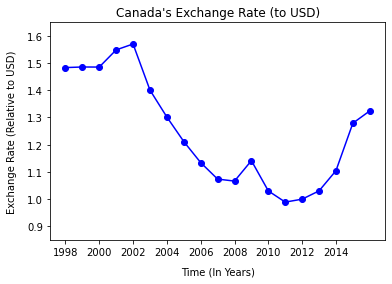

In [360]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Imports the file into our variable 'rate'
csv_path = "/Users/base/Desktop/Yearly Exchange Rates.csv"
rate = pd.read_csv(csv_path)

# Adjusted values for same dates
rate = rate[rate['Date'] >= '1998-01-01']

# Resets our index, and deletes the old one
rate.reset_index(inplace=True)
del rate['index']

# Extracting Canada again to display Exchange Rate
canada_e = rate[rate['Country'] == 'Canada']
canada_e = canada_e.iloc[:,[0,2]]
canada_e['Date'] = canada_e['Date'].apply(lambda x: x[0:4]).astype(str)
exchange = plt.plot(canada_e['Date'], canada_e['Value'],'bo-')
plt.xlabel('Time (In Years)', labelpad=10)
plt.ylabel('Exchange Rate (Relative to USD)', labelpad=10)
plt.title("Canada's Exchange Rate (to USD)")
plt.xticks(ticks=['1998','2000','2002','2004','2006','2008','2010','2012','2014'])
plt.ylim(0.85,1.65)
plt.show()

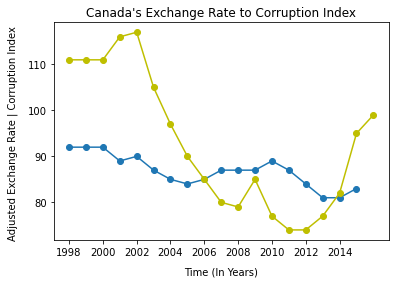

In [358]:

adjusted = canada_e['Value'].apply(lambda x: x*75).astype(int)
plt.plot(canada, 'o-')
plt.plot(canada_e['Date'], adjusted, 'yo-')
plt.xlabel('Time (In Years)', labelpad=10)
plt.ylabel('Adjusted Exchange Rate | Corruption Index ', labelpad=10)
plt.title("Canada's Exchange Rate to Corruption Index")
plt.xticks(ticks=['1998','2000','2002','2004','2006','2008','2010','2012','2014'])
plt.show()